## Lab 4: Working with 'real' data

### Jennifer Vo, lab partners with William Olsen

## Introduction

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,7)

## Problem 1

In this problem, I will be looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' My lab instructor has helpfully incorporated the meta-data into the data file.

### Part 1
First, I downloaded the data from the course website (gammaray_lab4.h5), and imported it into my working environment. I am using cloud python, so I imported this in the terminal using the command: "wget -O gammaray_lab4.h5 https://canvas.uw.edu/courses/1401649/files/67789336/download?wrap=1"

The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. 

In [2]:
# Import file
hf = h5py.File('gammaray_lab4.h5', 'r')

# Import data into an array
data = np.array(hf.get('data'))
# Let's print the first row as an example
print(data[:,0])
hf.close()

[9.40680016e+08 3.15000000e+02 4.50000000e+01 1.00000000e+01]


Next, I will make a few plots, exploring my data and making sure that I understand it. I will start by making scatter plots of the first 100 data points (rows) of the time vs solar phase, time vs earth longitude, and the time vs particle counts.

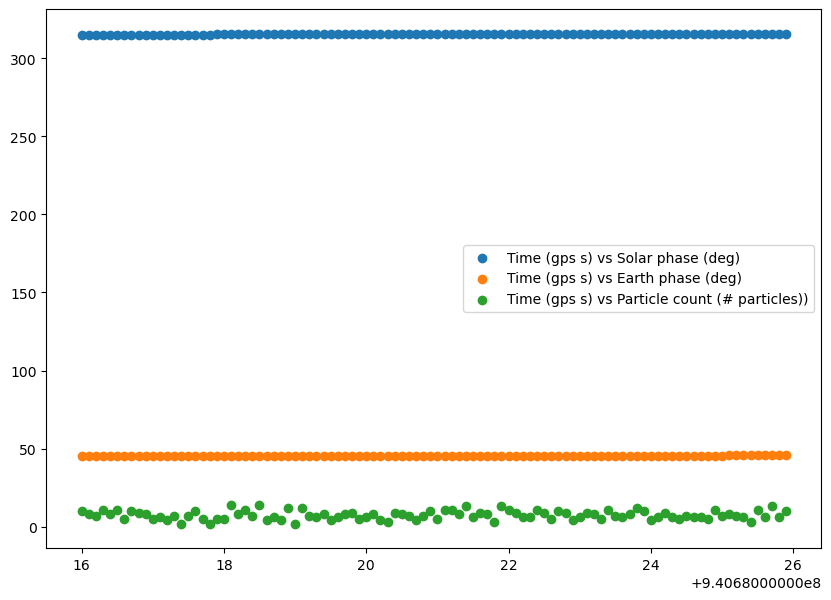

In [49]:
plt.scatter(data[0, 0:100], data[1, 0:100], label = 'Time (gps s) vs Solar phase (deg)')
plt.scatter(data[0, 0:100], data[2, 0:100], label = 'Time (gps s) vs Earth phase (deg)')
plt.scatter(data[0, 0:100], data[3, 0:100], label = 'Time (gps s) vs Particle count (# particles))')
plt.legend()
plt.show()

Let's try smearing the data, to see how it changes over a larger period of time. The entire dataset is 25 million records, so let's just take a look at 300k samples, but only every 3000 points. This should give us around 100 points on a scatter plot for each graph plotted.

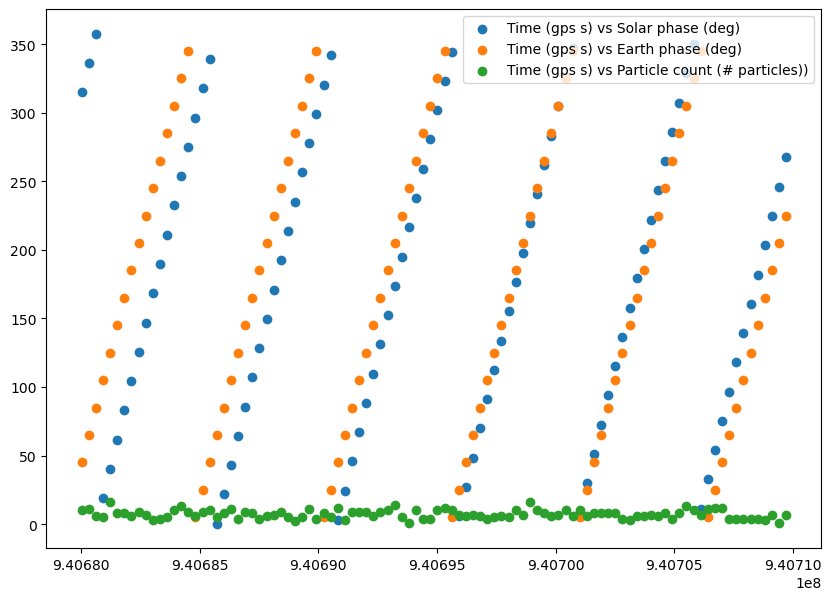

In [128]:
def plot_smear(start,end, steps):
    plt.scatter(data[0, start:end:steps], data[1, start:end:steps], label = 'Time (gps s) vs Solar phase (deg)')
    plt.scatter(data[0, start:end:steps], data[2, start:end:steps], label = 'Time (gps s) vs Earth phase (deg)')
    plt.scatter(data[0, start:end:steps], data[3, start:end:steps], label = 'Time (gps s) vs Particle count (# particles))')
    
plot_smear(0,300000,3000)
plt.legend()
plt.show()

From my observations, the Solar phase and Earth phase are positively correlated with time and repeat every 360 degrees (as expected), while the particle counts are fluctuating around some average particle count value. 

In addition, I see some signal contamination. It appears that the highest values of particle counts are measured when both the Solar phase and Earth phase degrees are high.

Let's also plot a 2d histogram to see if we can determine any more qualitative patterns about the data.

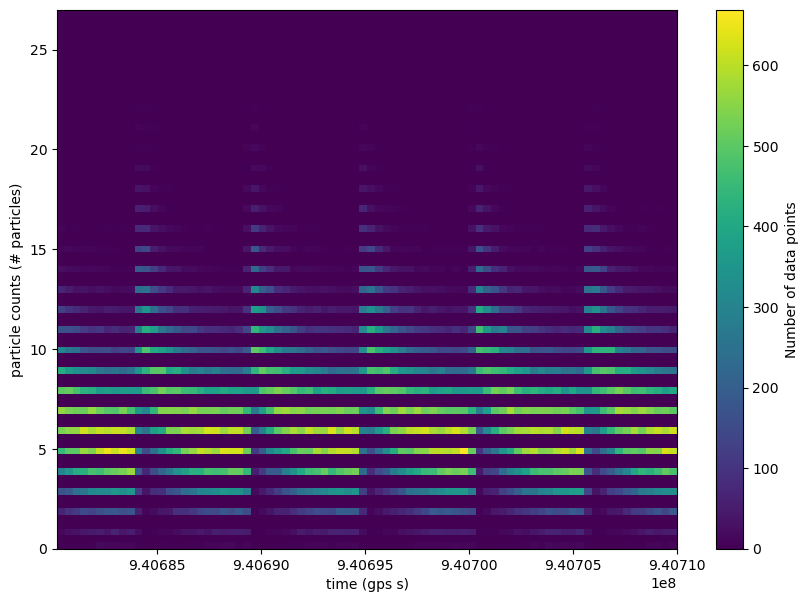

In [129]:
fig, ax = plt.subplots()
h = ax.hist2d(data[0, 2000:300000], data[3, 2000:300000], bins = 80)
fig.colorbar(h[3], ax = ax, label = 'Number of data points')
plt.xlabel('time (gps s)')
plt.ylabel('particle counts (# particles)')
plt.show()

From this 2d histogram, we can see that the average particle count is around 6 particles.

How can I build a background pdf() from this data? I know that the number of particles I can measure with my data collection must be discrete, so I have the choice between two main distributions: Binomial and Poisson.

### Part 2
The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes.

### Part 3
Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

### Part 4
Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

### Optional Part
While this is simulated data, it is based on a real effect seen by low Earth orbit satellites. Can you identify the cause of the variable background and propose a physical model?